### 导入包

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss
import random
%matplotlib inline

### 导入数据

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

### 查看数据情况

In [3]:
#查看数据前几行
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#查看各字段的信息
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#查看数据集行列
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [6]:
#观察数据值情况
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#取除id和price结果以外的所有数据汇集成总数据，重新构成索引
all_df=pd.concat((df_train.loc[:,'MSSubClass':'SaleCondition'],df_test.loc[:,'MSSubClass':'SaleCondition']),axis=0,ignore_index=True)

In [8]:
all_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
#MSSubClass给建筑分类，所以数值的大小没有意义，转化为字符型变量
all_df['MSSubClass']=all_df['MSSubClass'].astype(str)
df_train['MSSubClass']=df_train['MSSubClass'].astype(str)
df_test['MSSubClass']=df_test['MSSubClass'].astype(str)

In [10]:
#查看缺失值情况
total=df_train.isnull().sum().sort_values(ascending=False)
print(total)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64


In [12]:
#统计不同类型的特征
object_=[f for f in all_df.columns if all_df.dtypes[f]=='object']
not_object_=[f for f in all_df.columns if all_df.dtypes[f]!='object']

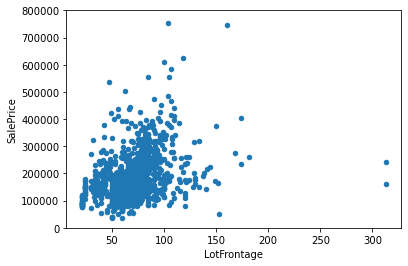

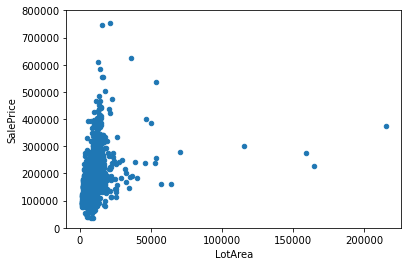

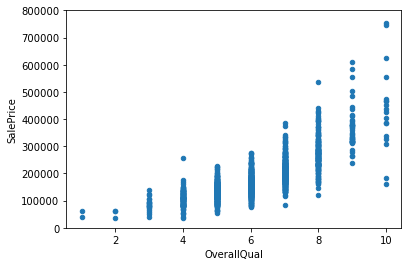

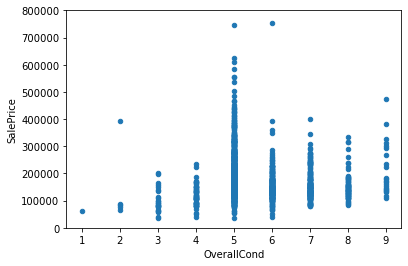

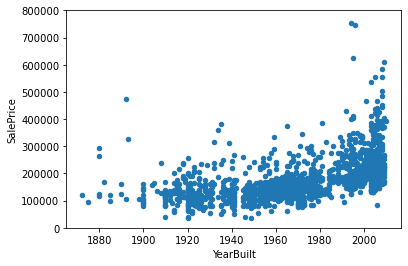

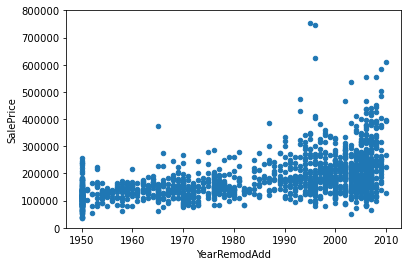

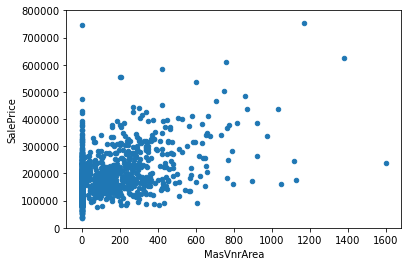

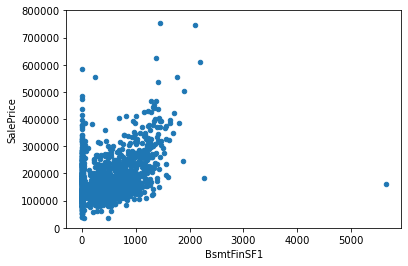

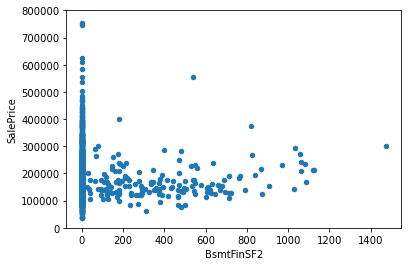

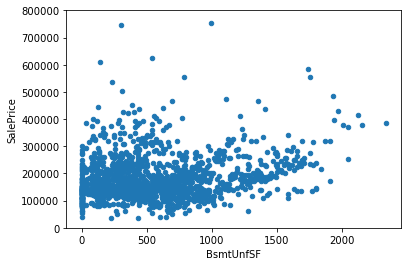

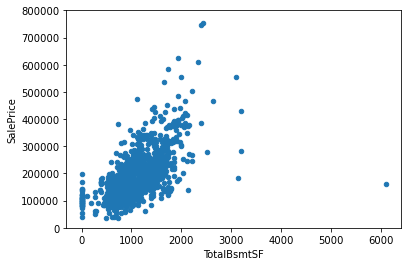

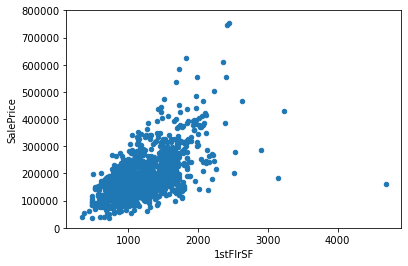

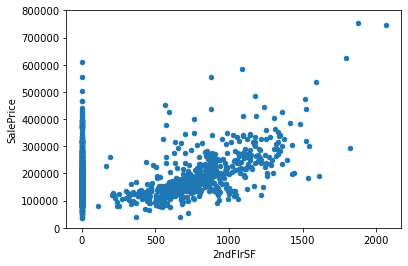

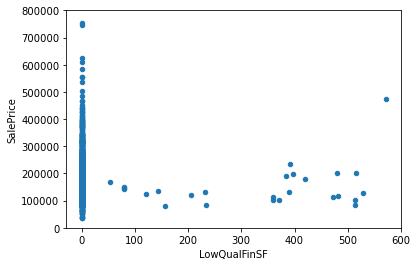

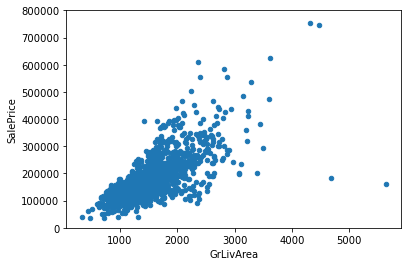

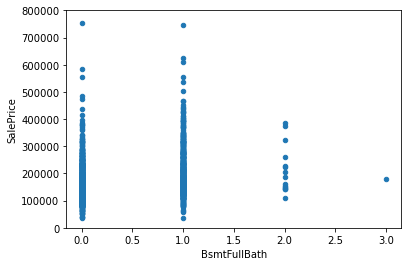

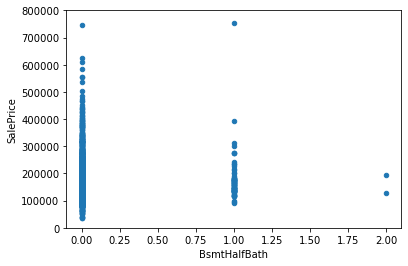

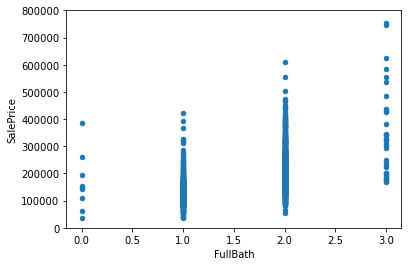

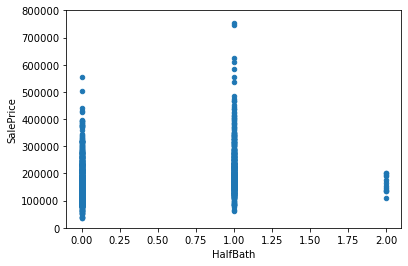

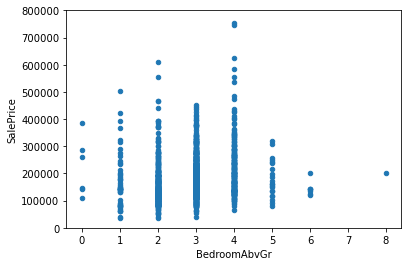

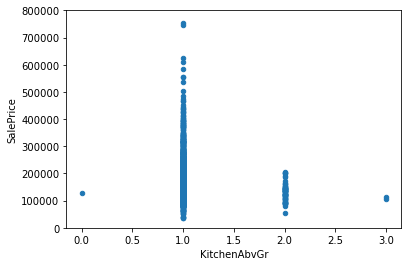

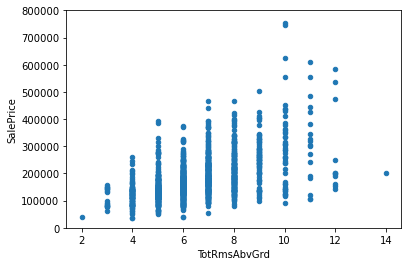

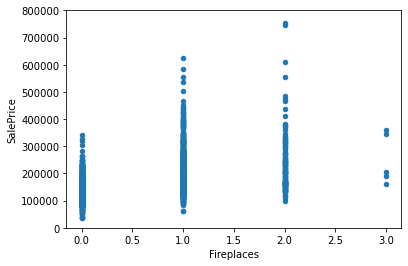

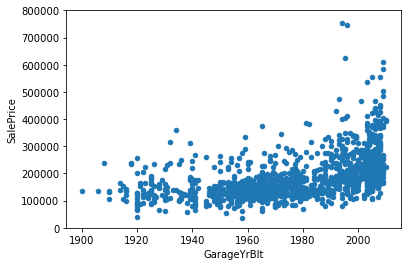

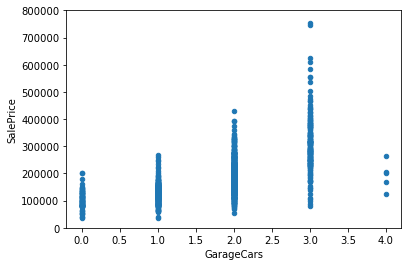

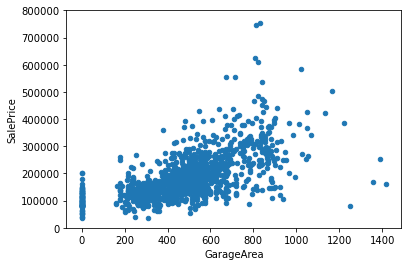

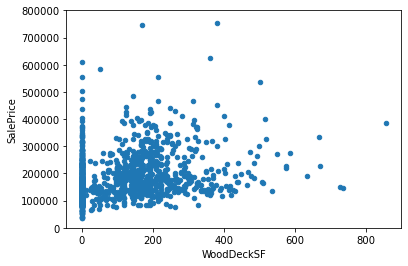

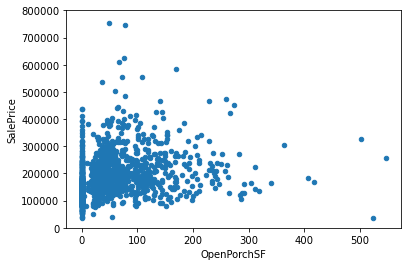

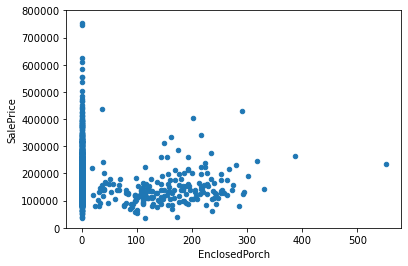

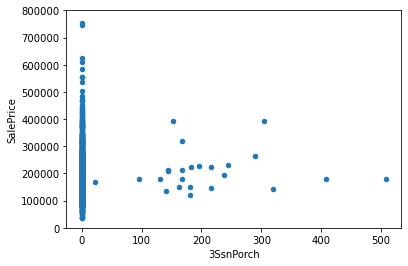

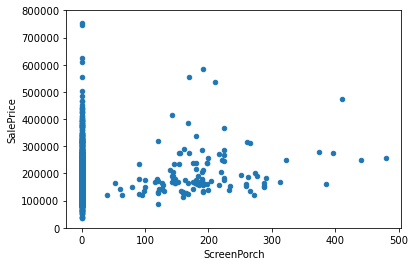

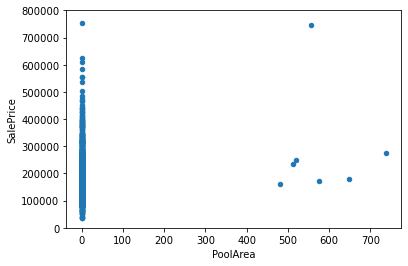

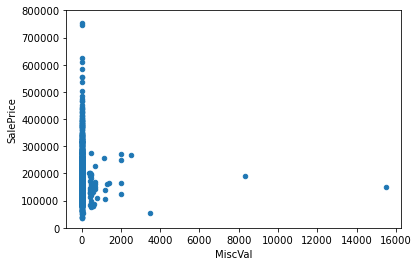

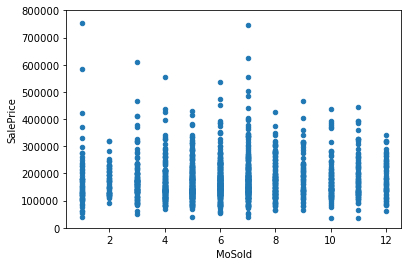

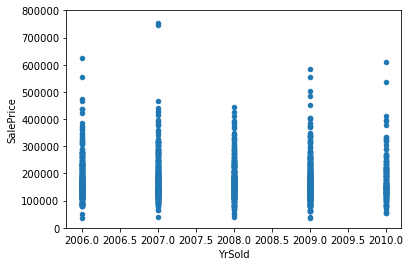

In [13]:
#查看特征与price之间的关系
for f in not_object_:
    if f!='Id' and f!='SalePrice':
        df_train.plot.scatter(x=f,y='SalePrice',ylim=(0,800000))
        plt.show()

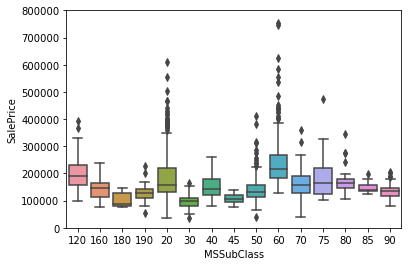

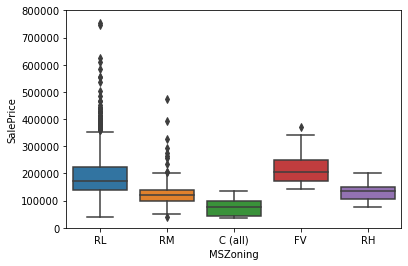

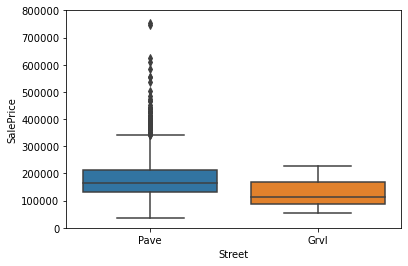

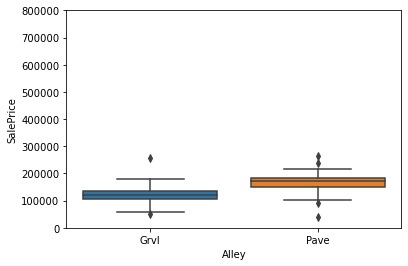

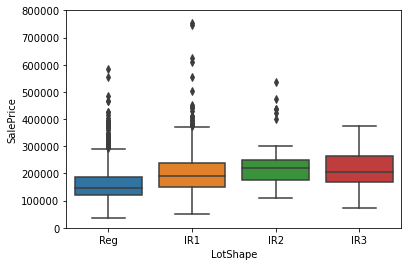

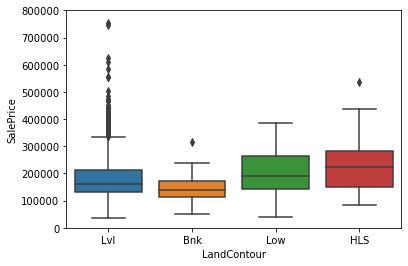

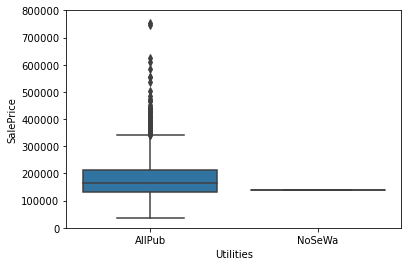

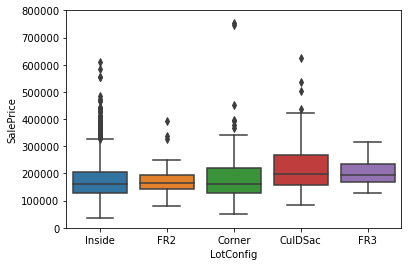

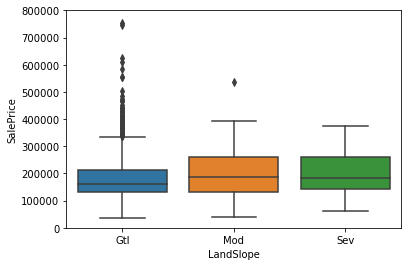

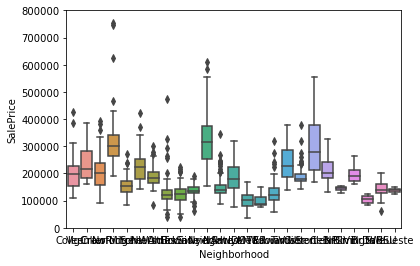

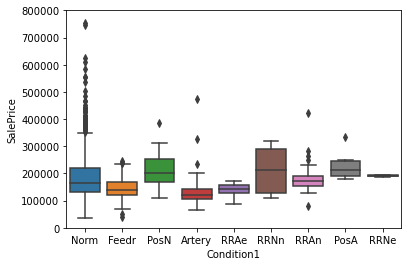

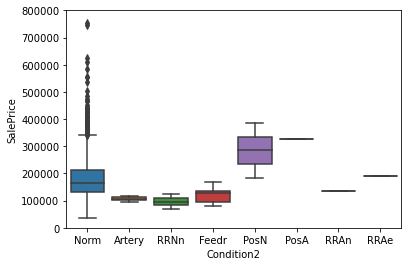

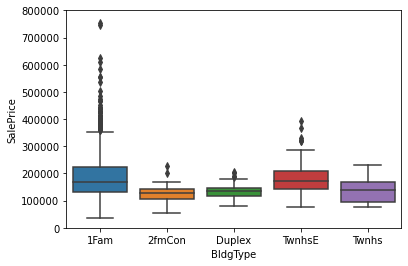

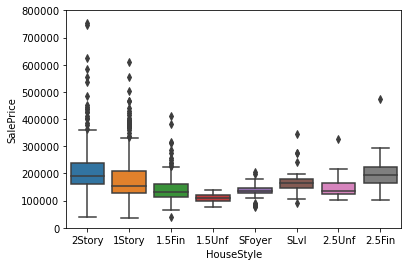

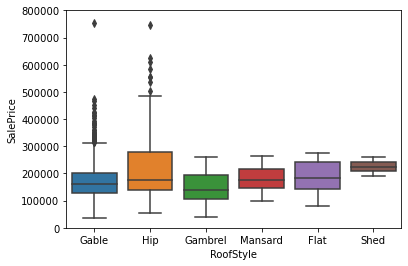

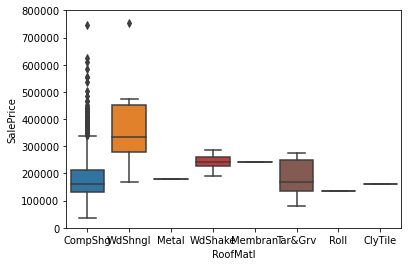

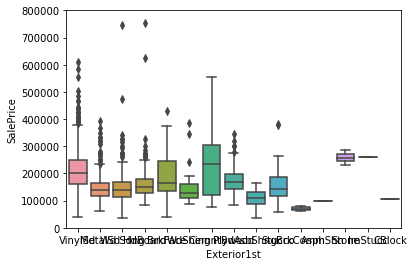

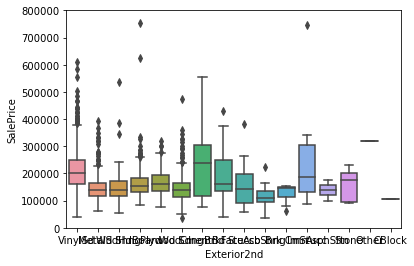

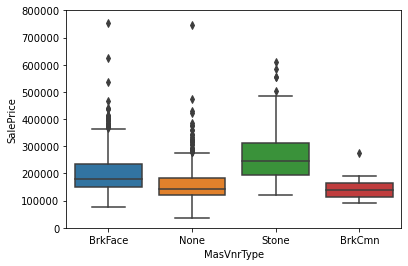

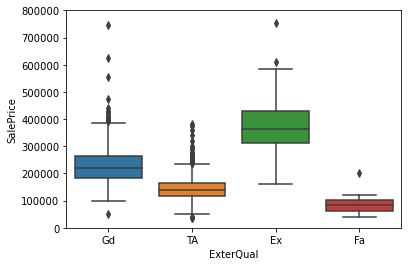

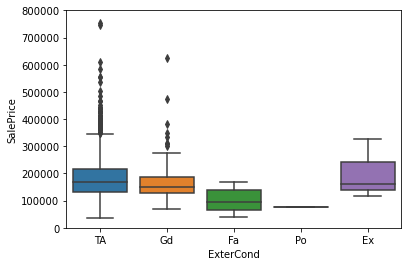

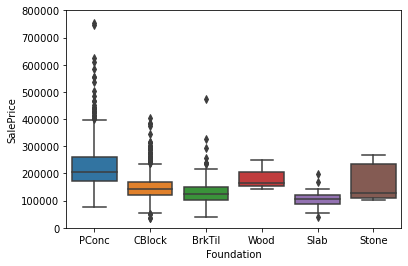

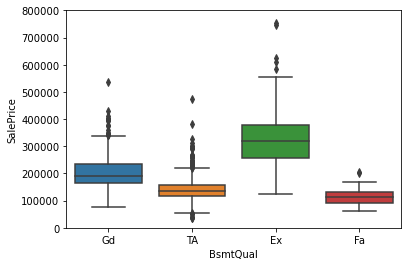

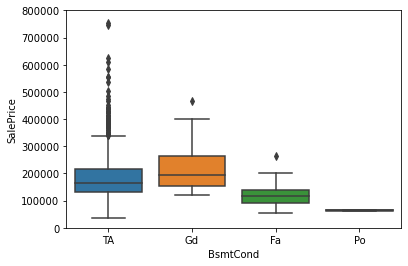

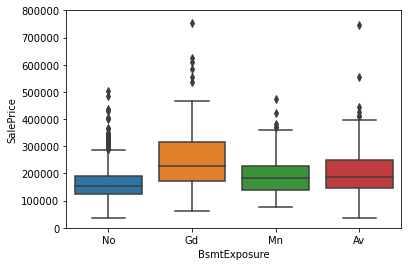

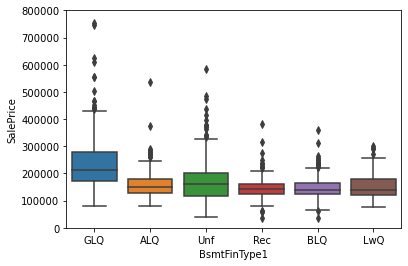

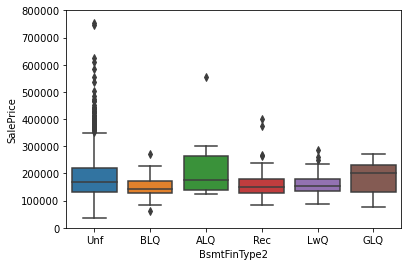

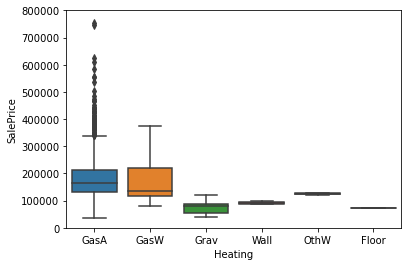

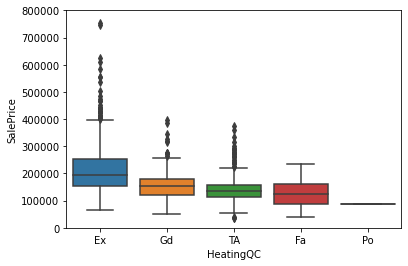

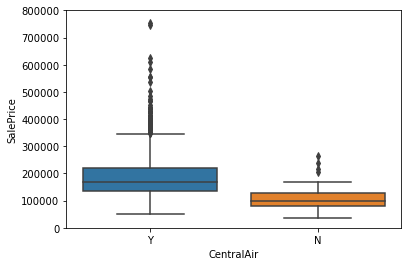

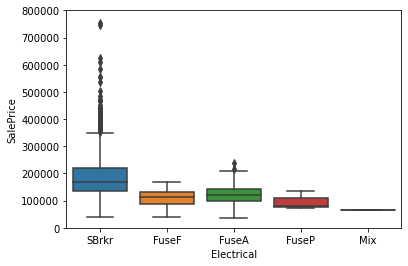

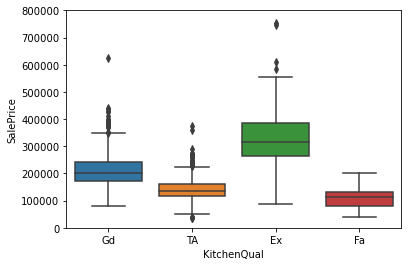

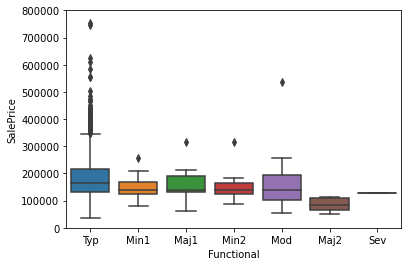

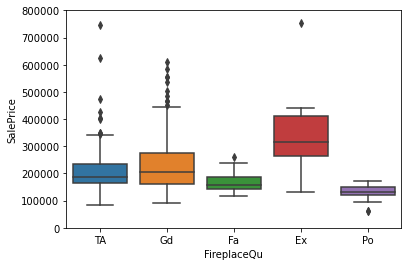

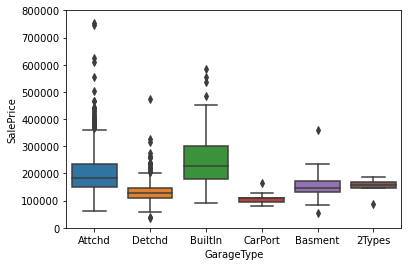

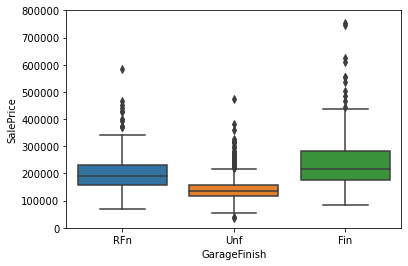

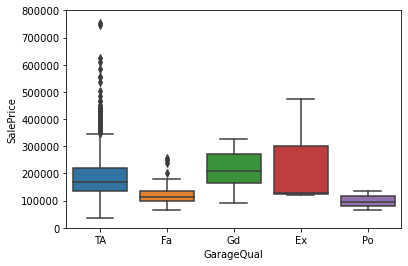

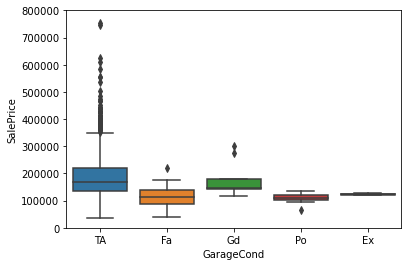

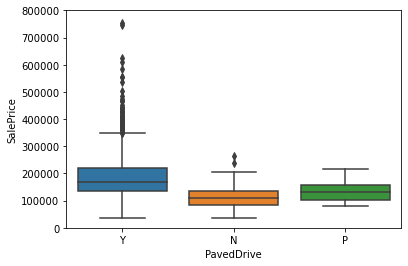

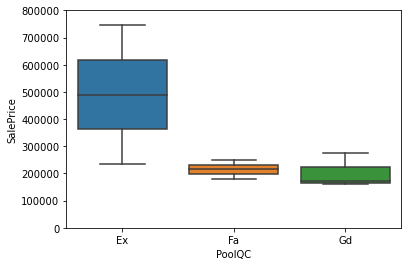

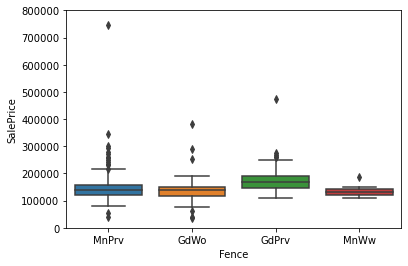

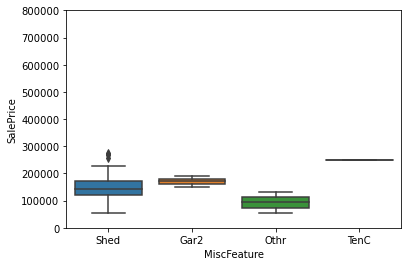

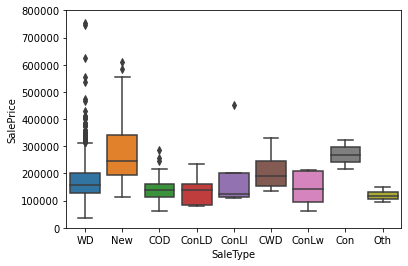

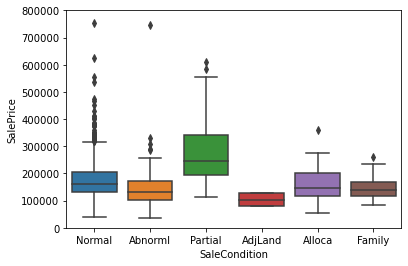

In [14]:
for f in object_:
    if f!='Id' and f!='SalePrice':
        fig=sns.boxplot(f,y='SalePrice',data=df_train)
        fig.axis(ymin=0,ymax=800000)
        plt.show()

### 数据清洗

In [15]:
#统计空值
missing=all_df.isnull().sum()
missing.sort_values(inplace=True,ascending=False)
missing=missing[missing>0]

In [16]:
#缺失值的类型
types=all_df[missing.index].dtypes
#缺失值的比例
percent=((all_df[missing.index].isnull().sum())/(all_df[missing.index].isnull().count())).sort_values(ascending=False)

missing_data=pd.concat([missing,percent,types],axis=1,keys=['Total','Percent','Types'])
missing_data.sort_values('Total',ascending=False,inplace=True)
missing_data

,Total,Percent,Types
PoolQC,2909,0.996574,object
MiscFeature,2814,0.964029,object
Alley,2721,0.932169,object
Fence,2348,0.804385,object
FireplaceQu,1420,0.486468,object
LotFrontage,486,0.166495,float64
GarageFinish,159,0.054471,object
GarageYrBlt,159,0.054471,float64
GarageQual,159,0.054471,object
GarageCond,159,0.054471,object


In [20]:
#前面四种缺失值过多的数据直接在数据类型中删去
all_df=all_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [21]:
#经过观察剩下的缺失值的列，选择填充各个特征的方式

#填充None 只可以填充名称性数据
cols=['FireplaceQu','GarageCond','GarageQual','GarageYrBlt','GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType']
for col in cols:
    all_df[col].fillna('None',inplace=True)
    
#填充0 数值类型
cols=['MasVnrArea','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','GarageArea','GarageCars']
for col in cols:
    all_df[col].fillna(0,inplace=True)
    
#填充均值
cols=['LotFrontage','TotalBsmtSF']
for col in cols:
    all_df[col].fillna(np.mean(all_df[col]),inplace=True)
    
#填充众数
cols=['MSZoning','BsmtHalfBath','Utilities','Functional','BsmtFullBath','Exterior2nd','Exterior1st','SaleType','Electrical','KitchenQual']
for col in cols:
    all_df[col].fillna(all_df[col].mode()[0],inplace=True)

In [22]:
#查看是否已填充完
all_df.isnull().sum()[all_df.isnull().sum()>0]

Series([], dtype: int64)

### 处理异常值

Text(0, 0.5, 'SalePrice')

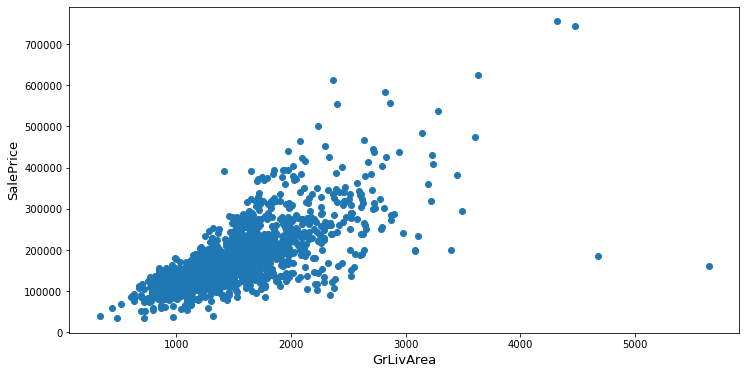

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(x=df_train.GrLivArea,y=df_train.SalePrice)
plt.xlabel('GrLivArea',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)

In [24]:
drop_index=df_train[(df_train['GrLivArea']>4000)&(df_train['SalePrice']<300000)].index

In [25]:
#删除异常点
df_train.drop(drop_index,inplace=True)
all_df.drop(drop_index,inplace=True)

Text(0, 0.5, 'SalePrice')

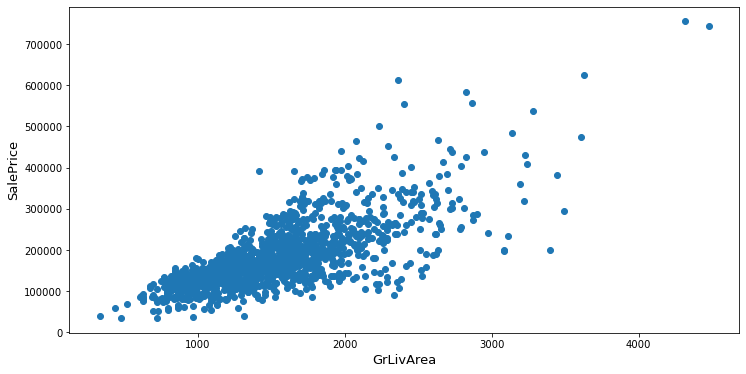

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(x=df_train.GrLivArea,y=df_train.SalePrice)
plt.xlabel('GrLivArea',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)

### 特征选择

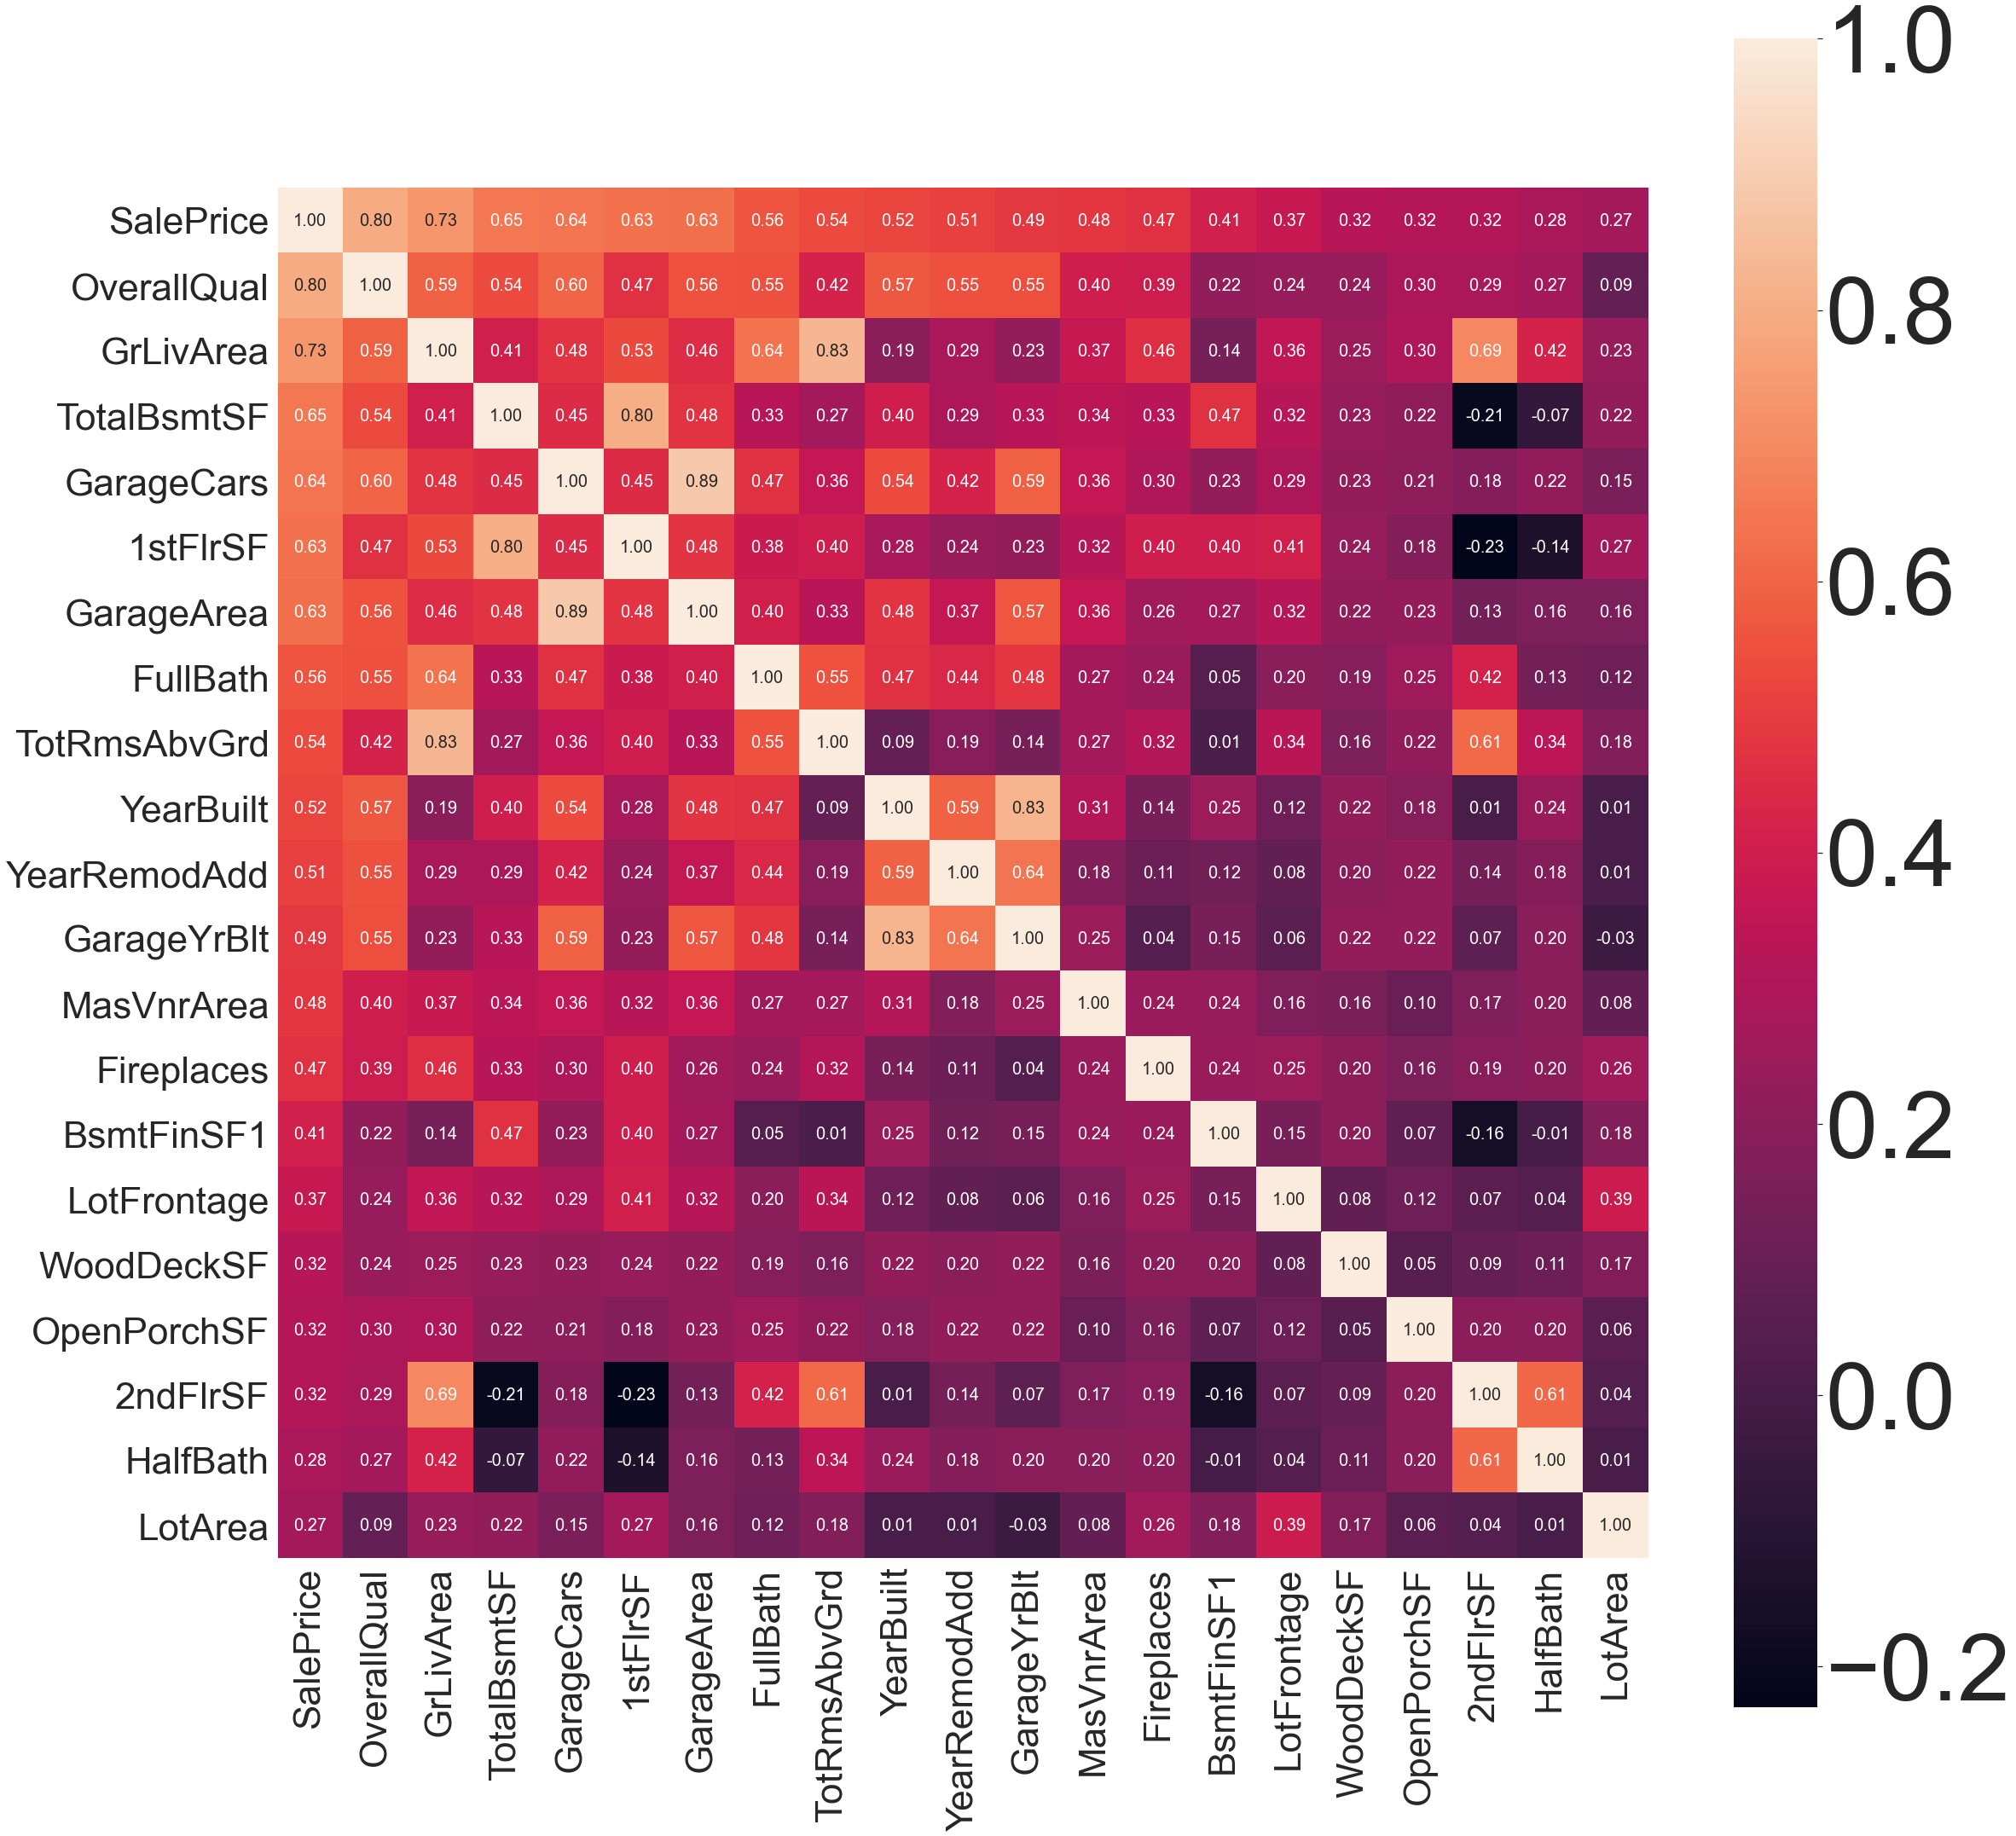

In [28]:
#选择与SalePrice相关性最大的前20个其他特征，做出热点图
corrmat=df_train.corr()
f,ax = plt.subplots(figsize = (36,36))
k=21
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
#计算相关性
#cm=np.corrcoef(df_train[cols].values.T)
cm=df_train[cols].corr()
sns.set(font_scale=10)#旁边轴标签的大小
#cbar右边的颜色标识轴，aanot相关性的系数是否显示，square正方形，fmt系数全部为两位小数，annot_kws系数数字大小
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

分析：
1. `OverallQual` `GrLivArea`这两个变量与`SalePrice`有很强的线性关系
2. 同时与`SalePrice`有比较强的线性关系的还有 `TotalBsmtSF` `GarageCars` `1stFlrSF` `GarageArea` `FullBath` `TotRmsAbvGrd` `YearBuilt` `YearRemodAdd`
3. 通过观察以上各特征与其他特征的相关系数得出 `TotalBsmtSF`与`1stFlrSF` 有很强的相关性，所以取`TotalBsmtSF`;`GarageCars`和`GarageArea`有很强的相关性，所以取`GarageCars`;`TotRmsAbvGrd`与`GrLivArea`有很强的相关性，所以取`GrLivArea`;`YearRemodAdd`与`YearBuilt`有较强的相关性，所以取`YearBuilt`

最后选取的特征有：`OverallQual` `GrLivArea` `TotalBsmtSF` `GarageCars` `FullBath` `YearBuilt`

In [30]:
#把训练集和测试集按原来的索引分出来，且去掉别的特征只保留选出来的特征
re_train=all_df.loc[:1459,['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','FullBath','YearBuilt']]
re_test=all_df.loc[1460:,['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','FullBath','YearBuilt']]
re_test=re_test.reset_index()
re_test=re_test.drop(['index'],axis=1)

In [31]:
print(re_test.head())
print(re_train.head())

   OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt
0            5        896        882.0         1.0         1       1961
1            6       1329       1329.0         1.0         1       1958
2            5       1629        928.0         2.0         2       1997
3            6       1604        926.0         2.0         2       1998
4            8       1280       1280.0         2.0         2       1992
   OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt
0            7       1710        856.0         2.0         2       2003
1            6       1262       1262.0         2.0         2       1976
2            7       1786        920.0         2.0         2       2001
3            7       1717        756.0         3.0         1       1915
4            8       2198       1145.0         3.0         2       2000


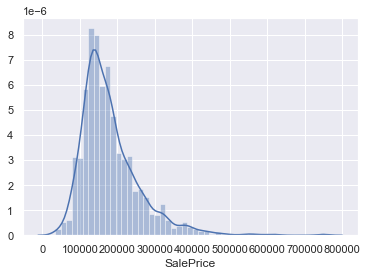

6.496606038358726
1.8793604459195012


In [32]:
sns.set(font_scale=1)
#观察SalePrice的峰度
sns.distplot(df_train['SalePrice'])
plt.show()

#计算峰度和偏度
print(ss.kurtosis(df_train['SalePrice']))
print(ss.skew(df_train['SalePrice']))

观察可以得到：SalePrice分布偏右，比较陡峭

In [33]:
#对SalePrice做平滑/正态化处理，便于分类器的学习
price_train=np.log1p(df_train['SalePrice'])

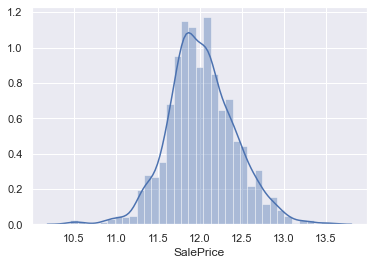

In [34]:
sns.distplot(price_train)
plt.show()

In [35]:
#观察选择出来的特征是否有非数值型数据，对数值型数据进行标准化
print(re_train.columns[re_train.dtypes=='object'])

#标准化数据 (X-mean(X))/std
re_train_means=re_train.mean()
re_train_std=re_train.std()
re_test_means=re_test.mean()
re_test_std=re_test.std()

numeric_train=(re_train-re_train_means)/re_train_std
numeric_test=(re_test-re_test_means)/re_test_std

Index([], dtype='object')


### 模型建立

#### 使用批量梯度下降法

In [36]:
#使用多元线性回归
#因为所有特征都做了标准化处理，所以不会出现特征值大小相差过多的情况，可以直接进行

#定义线性模型，输入和模型的参数θ相乘得到预测的结果
def net(X,theta):
    return np.dot(X,theta.T)

#定义损失函数，平方误差
def costFunc(h,y):
    cost=np.power((h-y),2)
    return np.sum(cost)/(len(y)*2)

#定义梯度下降模型
def gradientDes(X,y,theta,alpha,iters):
    #取一组theta的个数，先降为一维
    thetaNum=int(np.ravel(theta).shape[0])
    #定义theta的中间量供中途储存更新后的theta
    temp=np.zeros(theta.shape)
    #记录损失
    cost=[]
    
    #每次遍历沿着梯度反方向选择最好的数据进行更新
    for i in range(iters):
        #计算此theta的误差
        error=np.dot(X,theta.T)-y
        
        #遍历theta进行更新
        for j in range(thetaNum):
            #计算，error和xi对应位置相乘
            temp[0,j]=theta[0,j]-(alpha/len(X))*np.sum(error*X[:,j].reshape(error.shape))
            
        #更新theta
        theta=temp
        
        #目前预测出来的数值
        h=net(X,theta)
        #目前的损失函数
        loss=costFunc(h,y)
        cost.append(loss)
        
        #每迭代100次输出一次图像和数据
        if (i+1)%100==0:
            print("Epoch %s. Moving loss: %s. theta0:%s, theta1:%s, theta2:%s, theta3:%s, theta4:%s, theta5:%s, theta6:%s"  
                  % (i, loss,theta[0][0],theta[0][1], theta[0][2],theta[0][3],theta[0][4],theta[0][5],theta[0][6]))
            plot(cost,X,theta)
    
    return theta,cost

#定义绘图函数
def plot(losses, X, theta, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    #这里取每个房子的所有特征值的均值作为画到图上的x
    fg2.plot(X.mean(axis=1)[:sample_size],
             net(X[:sample_size, :], theta), 'or', label='Estimated')
    fg2.plot(X.mean(axis=1)[:sample_size],
             y[:sample_size,:], '*g', label='Real')
    fg2.legend()
    plt.show()#把之前处理好的数据转化成数组的形式，t#把之前处理好的数据转化成数组的形式，train数据前加上常数列

In [37]:
#把之前处理好的数据转化成数组的形式，train数据前加上常数列
X=np.array(numeric_train)
y=np.array(price_train).reshape(len(np.array(price_train)),1)
X = np.insert(X, 0, values=np.ones(len(X)), axis=1)

In [ ]:
'''不用平滑后的数据处理呢
y_not=np.array(df_train['SalePrice']).reshape(len(np.array(df_train['SalePrice'])),1)

经过测试，虽然从预测出来的数据看不出明显差别，但是损失函数值非常大，kaggle评分较低'''

Epoch 99. Moving loss: 0.014472644835355925. theta0:11.958747151827925, theta1:0.09741530245528057, theta2:0.15620009535497115, theta3:0.0892020368142075, theta4:0.05437905788692579, theta5:-0.005991778780731328, theta6:0.08906008621534911


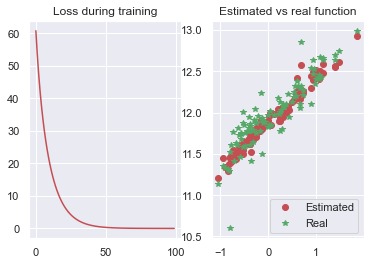

Epoch 199. Moving loss: 0.012112866863147342. theta0:12.023628734558578, theta1:0.12280326802428244, theta2:0.1553823435769139, theta3:0.07837193592946931, theta4:0.0526835755408796, theta5:-0.01692081156702784, theta6:0.08302143848618558


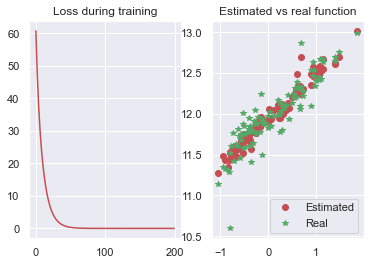

Epoch 299. Moving loss: 0.012105595131958968. theta0:12.024012867864995, theta1:0.12756277738563088, theta2:0.15420279771806042, theta3:0.07685917413746841, theta4:0.0521481601722218, theta5:-0.017881961395685396, theta6:0.08151659417468789


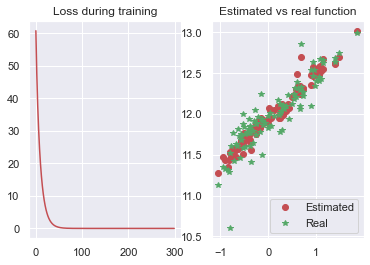

In [39]:
#训练
alpha=0.05
thetaNum=7
theta=np.array([[1,1,1,1,1,1,1]])
iters=300
theta,cost=gradientDes(X,y,theta,alpha,iters)

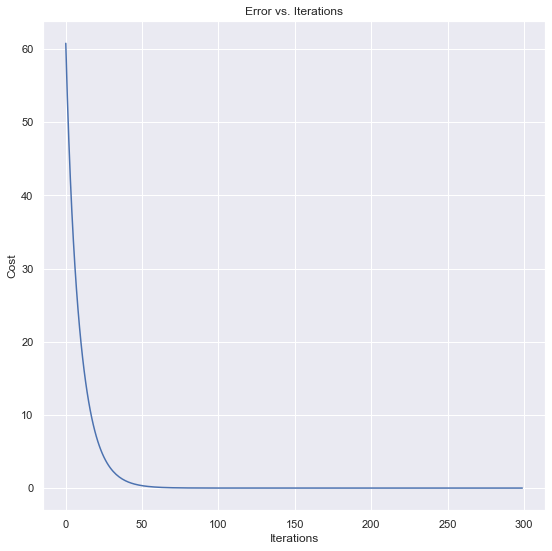

In [40]:
#绘制训练误差图
fig,ax=plt.subplots(figsize=(9,9))
ax.plot(np.arange(iters),cost,'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')
plt.show()

In [41]:
theta

array([[12.02401287,  0.12756278,  0.1542028 ,  0.07685917,  0.05214816,
        -0.01788196,  0.08151659]])

In [50]:
len(pre1)

1459

In [55]:
list(np.ravel(pre1))

[114877.76472249883,
 154425.59914794462,
 166684.61822686976,
 181142.07155391082,
 204243.15790171528,
 176579.2594106458,
 162840.17913371598,
 169246.44288053096,
 196412.51949822225,
 114650.89166801231,
 198166.35488306012,
 123854.66305700743,
 118032.82962543491,
 160494.69300323413,
 138649.17130450232,
 368463.6438390153,
 260262.51544598368,
 303500.6980264293,
 295156.8755554532,
 505853.514399036,
 326741.2608234677,
 221643.3758443498,
 180951.46502482938,
 181594.05115791885,
 170208.84394617242,
 206729.47851237215,
 344675.1327898847,
 264016.3737337432,
 189744.10449731376,
 194213.4146702285,
 201367.77914769738,
 105559.30825390718,
 172246.43596904323,
 304930.74949071207,
 300553.2767300157,
 213765.79185837164,
 203032.1677007939,
 167212.44317283313,
 167212.44317283313,
 155181.87208026112,
 171729.04791241398,
 158589.94751046062,
 263375.32866752427,
 237034.42831358532,
 213040.21721966646,
 209419.8638903407,
 252215.10558662066,
 191770.92610794507,
 16994

In [69]:
X_test=np.array(numeric_test)
X_test = np.insert(X_test, 0, values=np.ones(len(X_test)), axis=1)

#预测出来的数据转化回正态化之前的形式
pre=np.expm1(net(X_test,theta))
pre={'Id':df_test['Id'],
    'SalePrice':list(np.ravel(pre)),}
housePre=pd.DataFrame(pre)
np.savetxt('housePre.csv', housePre, delimiter = ',')

In [70]:
housePre

,Id,SalePrice
0,1461,114877.764722
1,1462,154425.599148
2,1463,166684.618227
3,1464,181142.071554
4,1465,204243.157902
...,...,...
1454,2915,101092.181869
1455,2916,108109.366356
1456,2917,144290.979355
1457,2918,120135.471756
